# Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
DrugData = pd.read_csv('drug-use-by-age.csv')
DrugData = DrugData.replace('-',0.0)
DrugData.iloc[:,2:] = DrugData.iloc[:,2:].astype('float64')
#DrugData.tail()

---

# 2. PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

The following code cells define the functions used throughout this notebook to generate the desired 2D and 3D plots. The code used to make the rotating 3D animation is shown at the very end of this notebook.

#### Color Maps and Markers for Plots

In [4]:
color_map_1 = sns.color_palette("Paired",12)
color_map_2 = sns.color_palette("Greys",5)
color_map_3 = (color_map_1+color_map_2)
color_map_4 = (color_map_1+color_map_2+color_map_3)
markers = (".","o","^","1","2","3","4","s","p","*","+","X","D","<",">","v","P")

#### Function to Calculate PCA Parameters

In [5]:
def PCA_Params_Calc(SubsetData,n):
    features = [col for col in SubsetData.columns]

    x = StandardScaler().fit_transform(DrugData.loc[:, features].values)
    pca_func = PCA(n_components=n)
    PC_Data = pca_func.fit_transform(x)
    
    PCA_Cols = ['PC'+str(i+1) for i in range(n)]
    principalDf = pd.DataFrame(data=PC_Data, columns=PCA_Cols)
    PCA_Data = pd.concat([DrugData[['age']],principalDf],axis = 1)
    return pca_func,PCA_Data

#### Plotting Function (3D Plot of Data along First 3 Principal Components)

In [6]:
def Plot_3D_PCA(PCA_dataset,title):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    PCA_Axis_x = ((min(PCA_dataset['PC1']), max(PCA_dataset['PC1'])), (0, 0), (0,0))
    ax.plot(PCA_Axis_x[0], PCA_Axis_x[1], PCA_Axis_x[2], 'black',label='Principal Axis 1')
    PCA_Axis_y = ((0, 0), (min(PCA_dataset['PC2']), max( PCA_dataset['PC2'])), (0,0))
    ax.plot(PCA_Axis_y[0], PCA_Axis_y[1], PCA_Axis_y[2], 'b',label='Principal Axis 2')
    PCA_Axis_z = ((0, 0), (0,0), (min( PCA_dataset['PC3']), max( PCA_dataset['PC3'])))
    ax.plot(PCA_Axis_z[0], PCA_Axis_z[1], PCA_Axis_z[2], 'r',label='Principal Axis 3')
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title(str(title))

    for i in range(PCA_dataset.shape[0]):
        ax.scatter(PCA_dataset['PC1'][i],PCA_dataset['PC2'][i],PCA_dataset['PC3'][i],
                   s=200, color=color_map_3[i],marker=markers[i],
                   label= DrugData['age'][i])

    ax.legend(loc="center right", bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), title='Age')
    plt.tight_layout()
    plt.show();

#### Plotting Function (2D Plots of First 3 Principal Components)

In [7]:
def Plot_PCA_2D_Plots(function,data,Untransformed_Data,scaling_factor=1):
    f, ax = plt.subplots(3,1,figsize=(10,20))
    plotting_data = data.iloc[:,1:]
    slope_12,intercept_12 = np.polyfit(plotting_data['PC1'],
                                       plotting_data['PC2'], 1)
    slope_13,intercept_13 = np.polyfit(plotting_data['PC1'],
                                       plotting_data['PC3'], 1)
    slope_23,intercept_23 = np.polyfit(plotting_data['PC2'],
                                       plotting_data['PC3'], 1)
    X_Range_1 = np.linspace(min(plotting_data['PC1']),max(plotting_data['PC1']))
    X_Range_2 = np.linspace(min(plotting_data['PC2']),max(plotting_data['PC2']))
    
    def Reg_Line(x_pts,slope,intercept):
        return x_pts*slope + intercept

    for i in range(len(data)):
        ax[0].scatter(x=plotting_data['PC1'][i],y=plotting_data['PC2'][i],
                      color=color_map_3[i],label= DrugData['age'][i])
        ax[1].scatter(x=plotting_data['PC1'][i],y=plotting_data['PC3'][i],
                      color=color_map_3[i])
        ax[2].scatter(x=plotting_data['PC2'][i],y=plotting_data['PC3'][i],
                      color=color_map_3[i])
    
    PCA_BiPlot(ax[0],function,data,Untransformed_Data,[0,1],scaling_factor)
    PCA_BiPlot(ax[1],function,data,Untransformed_Data,[0,2],scaling_factor)
    PCA_BiPlot(ax[2],function,data,Untransformed_Data,[1,2],scaling_factor)
    
    ax[0].plot(X_Range_1,Reg_Line(X_Range_1,slope_12,intercept_12),
               color="black",label="Fit Line PC1 & PC2",linewidth=2)
    ax[1].plot(X_Range_1,Reg_Line(X_Range_1,slope_13,intercept_13),
               color="black",label="Fit Line PC1 & PC3",linewidth=2)
    ax[2].plot(X_Range_2,Reg_Line(X_Range_2,slope_23,intercept_23),
               color="black",label="Fit Line PC2 & PC3",linewidth=2)
    
    ax[0].set_xlabel('Principal Component 1')
    ax[1].set_xlabel('Principal Component 1')
    ax[2].set_xlabel('Principal Component 2')
    ax[0].set_ylabel('Principal Component 2')
    ax[1].set_ylabel('Principal Component 3')
    ax[2].set_ylabel('Principal Component 3')
    ax[0].set(adjustable="box")
    ax[1].set(adjustable="box")
    ax[2].set(adjustable="box")
    f.legend(loc="center right", bbox_to_anchor=(0.75, 0, 0.5, 1), title='Age Group')
    plt.tight_layout()
    plt.show();

#### PCA Biplot Function

In [8]:
def PCA_BiPlot(ax,function,PCA_Transformed_Data,data,x_and_y,scaling_factor=1):
    x_PC = x_and_y[0]
    y_PC = x_and_y[1]
    xvector = function.components_[x_PC]
    yvector = function.components_[y_PC]
    
    xs = function.transform(data)[:,x_PC]
    ys = function.transform(data)[:,y_PC]
    
    for i in range(len(xvector)):
        ax.arrow(0, 0, (xvector[i]*max(xs)*scaling_factor),
                 (yvector[i]*max(ys)*scaling_factor),
                 color=color_map_4[i], width=0.0001, head_width=0.0005)
        ax.text((xvector[i]*max(xs)*scaling_factor*1.05),
                (yvector[i]*max(ys)*scaling_factor*1.05),
                (data.columns.values)[i], color=color_map_4[i],size='large')

    plt.tight_layout()

#### Function to Calculate Summed Variance Ratios

In [9]:
def Total_Var_Ratio_n_Comps(n,function,SubsetName):
    sum_var = 0
    for i in range(n):
        sum_var += function.explained_variance_ratio_[i]
    print("The proportion of the variance accounted for by these",n,
          "Principle Axes is:",'%.2f'%(sum_var*100),
          "% of variance of the",str(SubsetName),"Data.")

#### Scree Plot Function

In [10]:
def Scree_Plot(n,function,title):
    
    plt.figure(figsize=(8,6))
    PCA_Cols = ['PC'+str(i+1) for i in range(n)]
    
    plt.scatter(PCA_Cols,function.explained_variance_ratio_[:n],c='r')
    plt.plot(PCA_Cols,function.explained_variance_ratio_[:n])
    
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance')
    plt.title('Scree Plot of'+str(title))
    plt.ylim(0,(max(function.explained_variance_ratio_)+0.05))
    plt.tight_layout()

### Function Iteratively Project n-Dimensional Principal Component On To First Three Principal Components

In [11]:
# Projection Function
# Projection of an n Dimensional Point (PC1,...,PCn) to (proj_PC1,proj_PC2,proj_PC3) space.

def nD_to_ThreeD(Dataframe,n):

    order = int(n+1)
    data = Dataframe.iloc[:,1:order].values
    Proj_Pts = np.zeros((data.shape[0],order-1))
    
    cols = Dataframe.columns[1:order]
    
    for range0 in range(order-4):
        col_name = str('PC')+str(order-range0-1)
        PC_n = Dataframe[col_name]
        proj_height = max(PC_n)+np.std(PC_n)
        
        for i in range(len(data)):
            factor = proj_height/(proj_height-PC_n[i])
            Proj_Pts[i,:(order-range0)] = factor*data[i,:(order-range0)]
            Proj_Pts[i,(order-range0-2):] = 0
            
        Dataframe = pd.DataFrame(data=Proj_Pts,columns=cols)
    return Dataframe

#### Principal Components vs. Data Component Correlation Heatmap

In [12]:
def PCA_vs_Data_HeatMap(n,function,data):
    
    plt.figure(figsize = (16,10))
    
    ax = sns.heatmap(function.components_, cmap="vlag",annot=True,
                     yticklabels=["PCA"+str(x) for x in range(1,n+1)],
                     xticklabels=list(data.columns),
                     cbar_kws={"orientation": "vertical"})
    plt.tight_layout()

---

## PCA Of Drug Use Data

In [13]:
Substance_Use_Data = DrugData[['alcohol-use', 'marijuana-use',
                               'cocaine-use', 'crack-use', 'heroin-use',
                               'hallucinogen-use', 'inhalant-use',
                               'pain-releiver-use', 'oxycontin-use',
                               'tranquilizer-use', 'stimulant-use',
                               'meth-use', 'sedative-use']]

In [14]:
pca_use_func ,PCA_Data_Use = PCA_Params_Calc(Substance_Use_Data,
                                             Substance_Use_Data.shape[1])

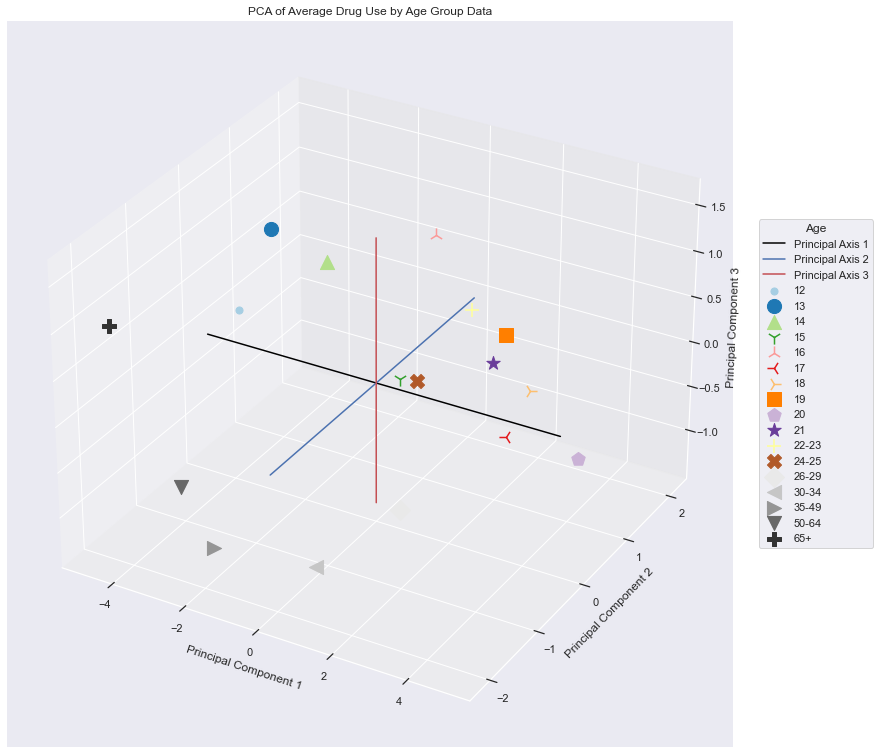

In [15]:
Plot_3D_PCA(PCA_Data_Use,'PCA of Average Drug Use by Age Group Data');

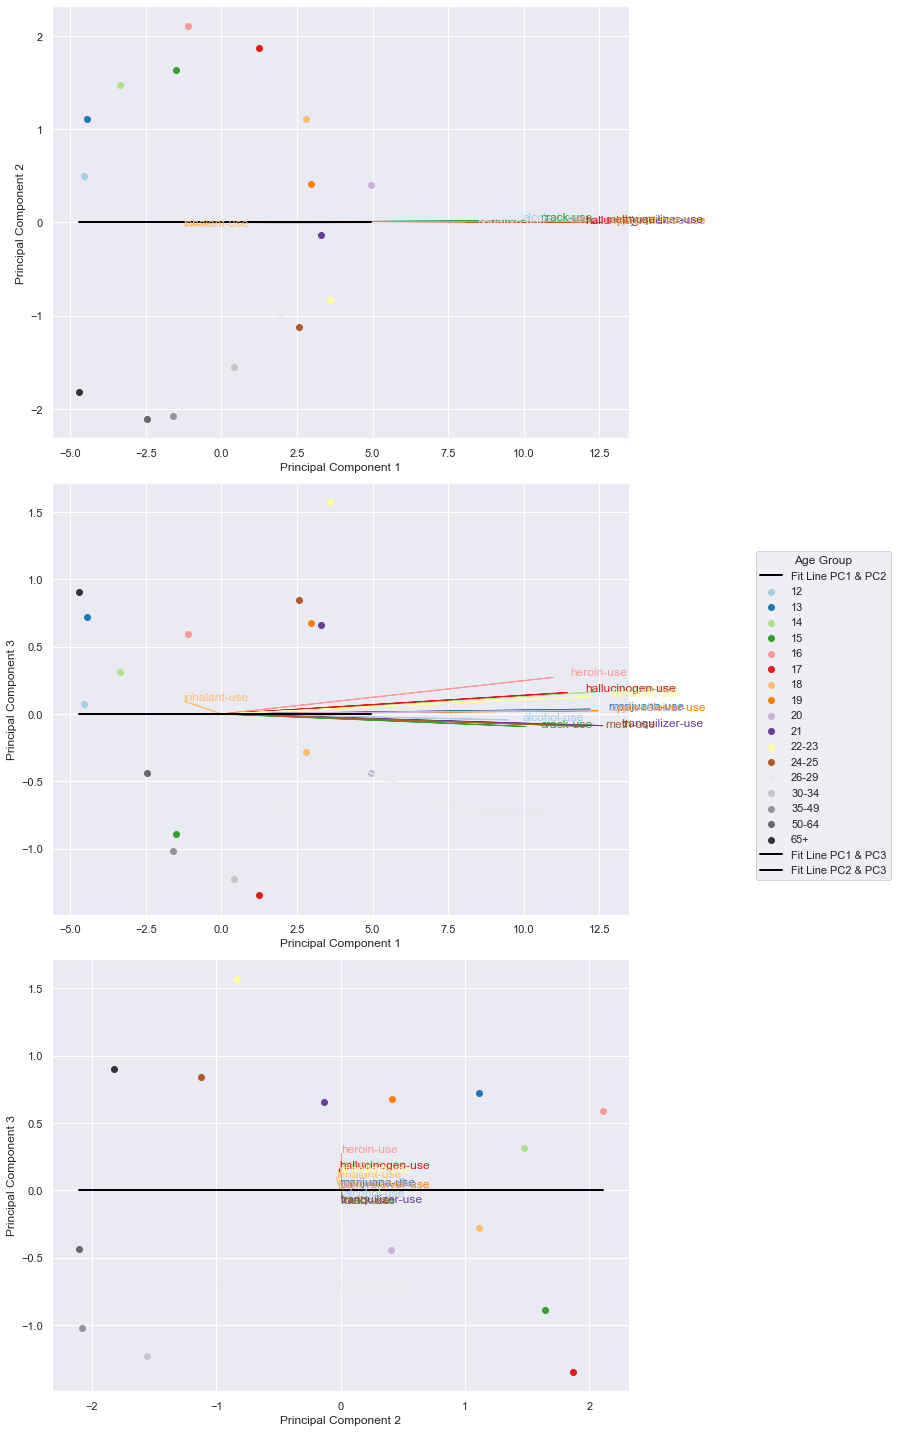

The proportion of the variance accounted for by these 3 Principle Axes is: 94.08 % of variance of the Drug Use by Age Group Data.


In [16]:
Plot_PCA_2D_Plots(pca_use_func,PCA_Data_Use,Substance_Use_Data,);
Total_Var_Ratio_n_Comps(3,pca_use_func,'Drug Use by Age Group')

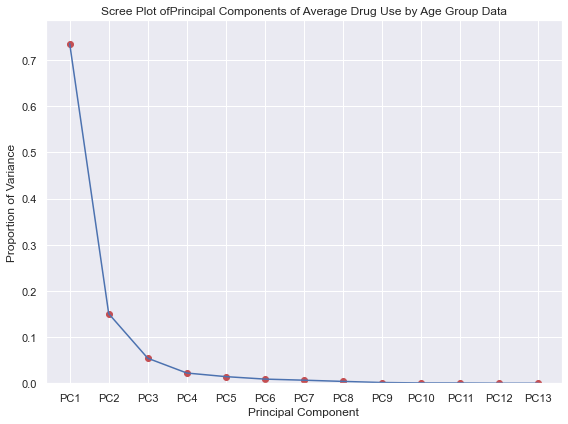

In [17]:
Scree_Plot(Substance_Use_Data.shape[1],pca_use_func,
           'Principal Components of Average Drug Use by Age Group Data')

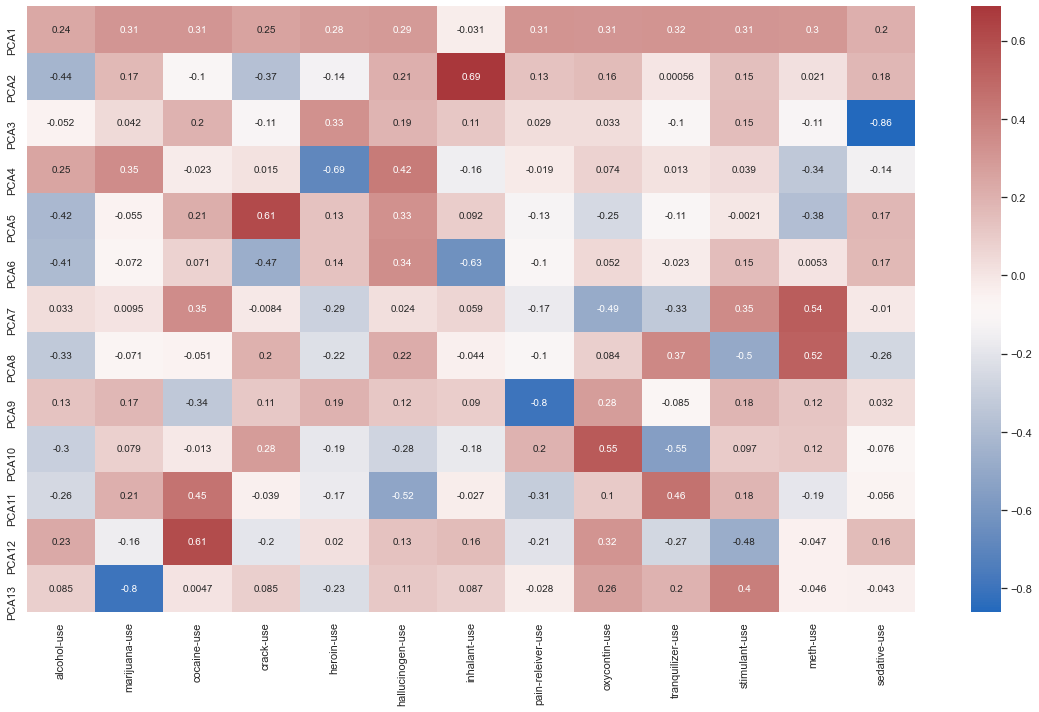

In [18]:
PCA_vs_Data_HeatMap(Substance_Use_Data.shape[1],pca_use_func,Substance_Use_Data)

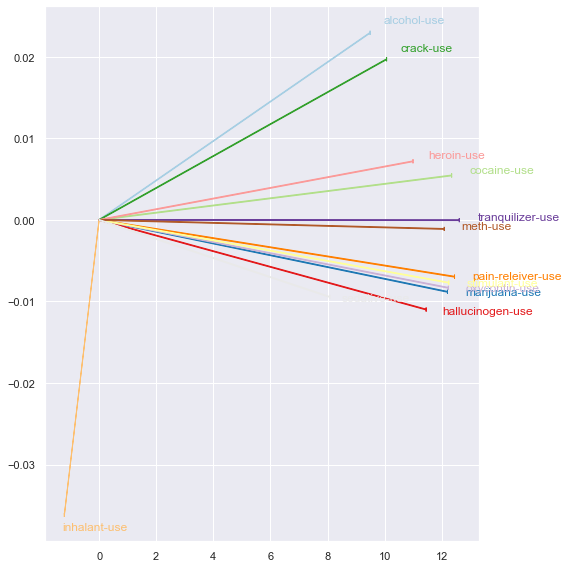

In [19]:
plt.figure(figsize=(8,8))
PCA_BiPlot(plt,pca_use_func,PCA_Data_Use,Substance_Use_Data,[0,1])

---

### PCA Of Frequency of Drug Use

In [20]:
Use_Frequency_Data = DrugData[['alcohol-frequency', 'marijuana-frequency',
                               'cocaine-frequency', 'crack-frequency',
                               'heroin-frequency', 'hallucinogen-frequency',
                               'inhalant-frequency', 'pain-releiver-frequency',
                               'oxycontin-frequency', 'tranquilizer-frequency',
                               'stimulant-frequency','meth-frequency',
                               'sedative-frequency']]

In [21]:
pca_freq_func,PCA_Data_Frequency = PCA_Params_Calc(Use_Frequency_Data,
                                                   Use_Frequency_Data.shape[1])

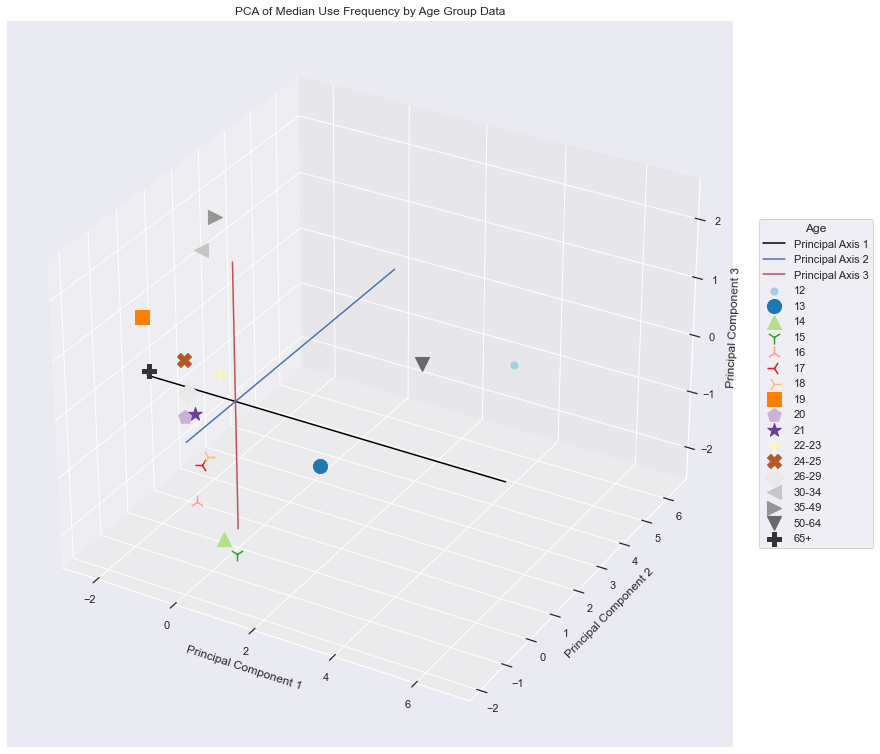

In [22]:
Plot_3D_PCA(PCA_Data_Frequency,'PCA of Median Use Frequency by Age Group Data');

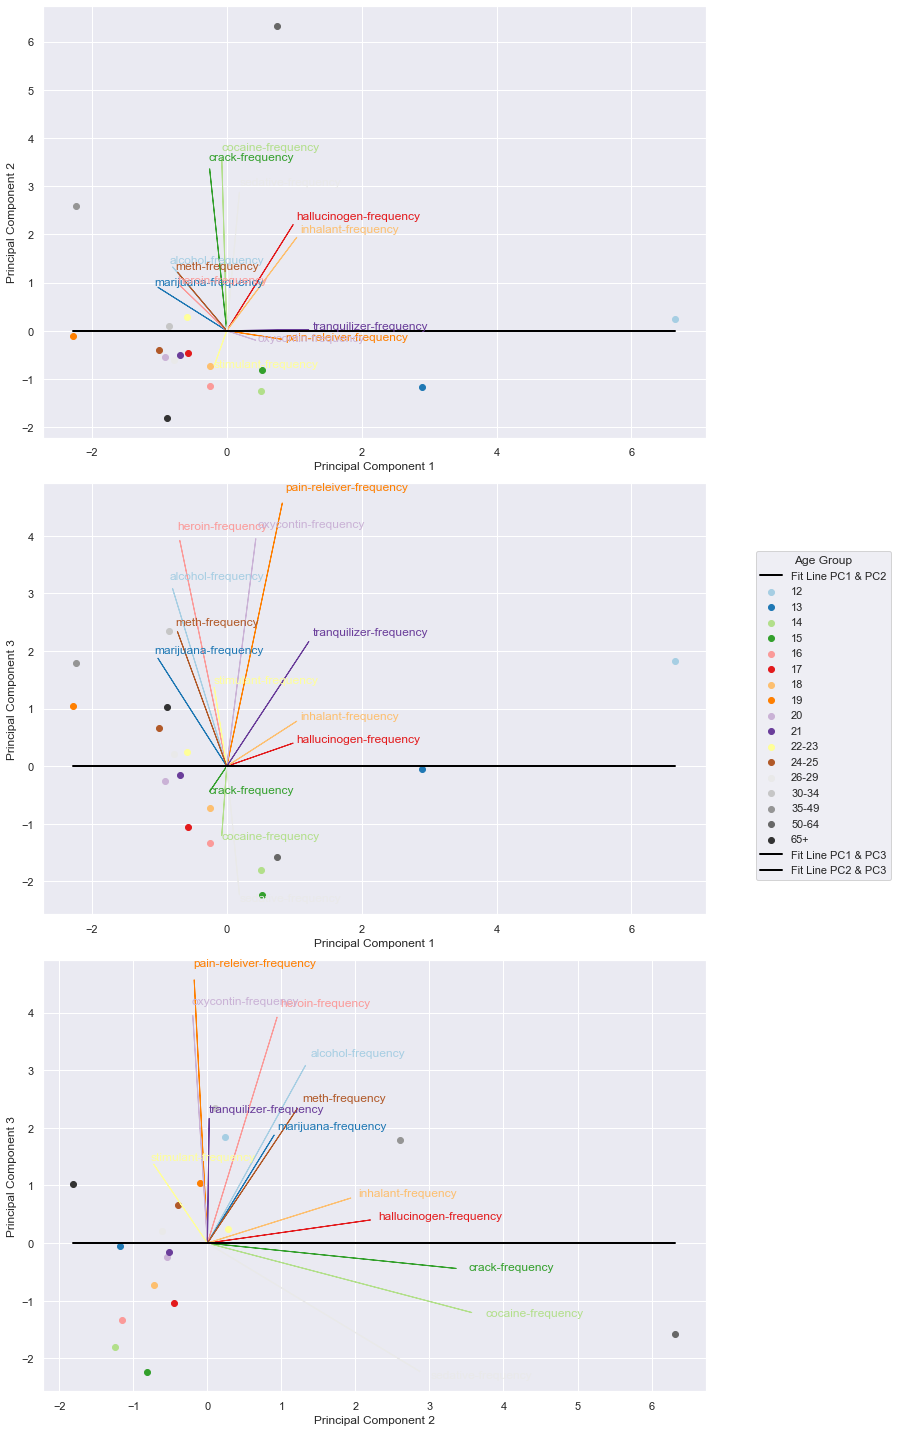

The proportion of the variance accounted for by these 3 Principle Axes is: 70.13 % of variance of the Median Drug Use Frequency by Age Group Data.


In [23]:
Plot_PCA_2D_Plots(pca_freq_func,PCA_Data_Frequency,Use_Frequency_Data,0.05);
Total_Var_Ratio_n_Comps(3,pca_freq_func,'Median Drug Use Frequency by Age Group')

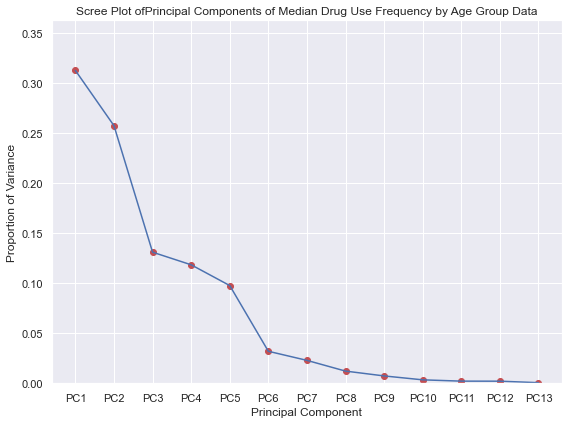

In [24]:
Scree_Plot(Substance_Use_Data.shape[1],pca_freq_func,
           'Principal Components of Median Drug Use Frequency by Age Group Data')

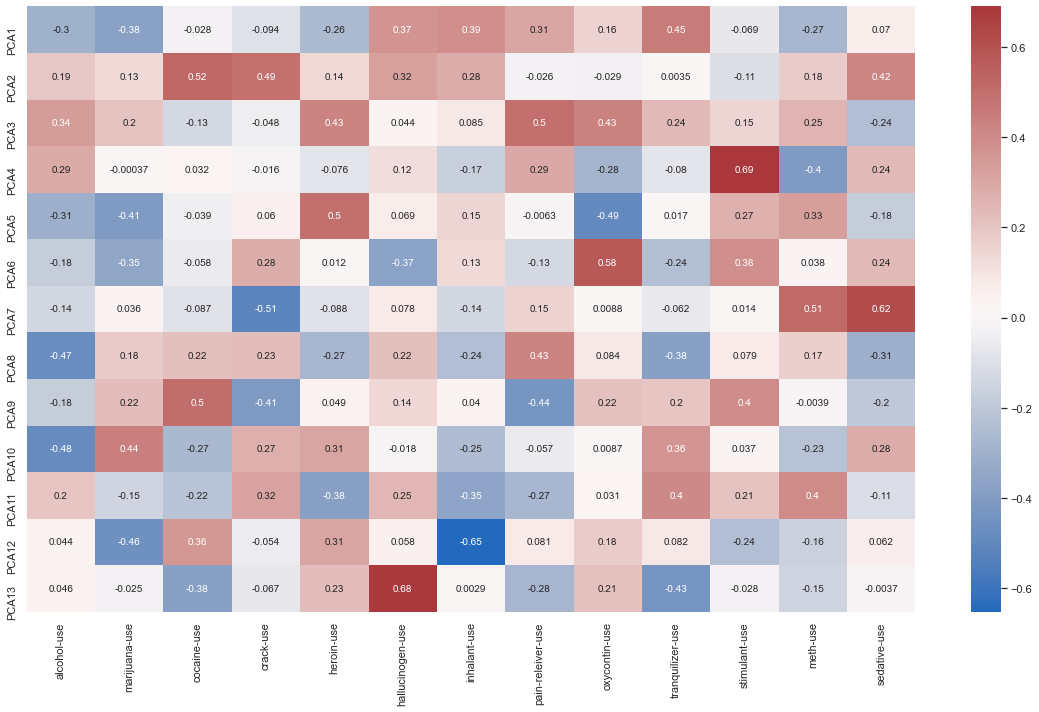

In [25]:
PCA_vs_Data_HeatMap(Use_Frequency_Data.shape[1],pca_freq_func,Substance_Use_Data)

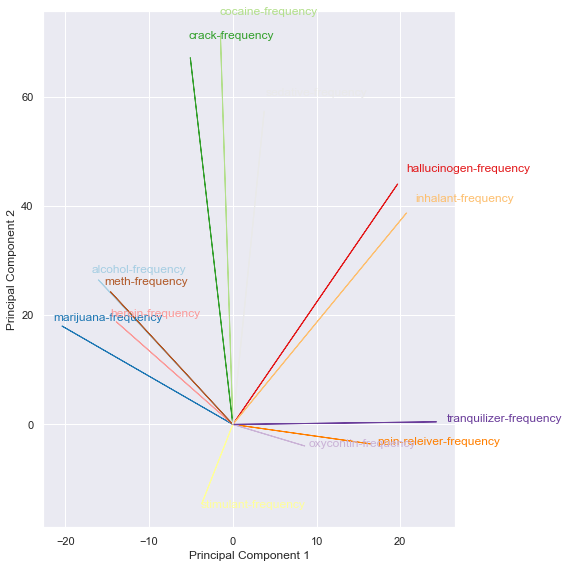

In [26]:
plt.figure(figsize=(8,8))
X_PCA_Comp = 1
Y_PCA_Comp = 2
plt.xlabel('Principal Component '+str(X_PCA_Comp))
plt.ylabel('Principal Component '+str(Y_PCA_Comp))
PCA_BiPlot(plt,pca_freq_func,PCA_Data_Frequency,Use_Frequency_Data,
           [X_PCA_Comp-1,Y_PCA_Comp-1])

---

### PCA of Truncated Substance Use and Substance Use Frequency Data

In [27]:
Substance_Use_and_Freq = DrugData[['alcohol-use', 'alcohol-frequency',
                                   'marijuana-use', 'marijuana-frequency',
                                   'hallucinogen-use', 'inhalant-frequency',
                                   'pain-releiver-frequency',
                                   'tranquilizer-frequency']]

In [28]:
pca_hcv_func,PCA_Data_HCV = PCA_Params_Calc(Substance_Use_and_Freq,
                                            Substance_Use_and_Freq.shape[1])

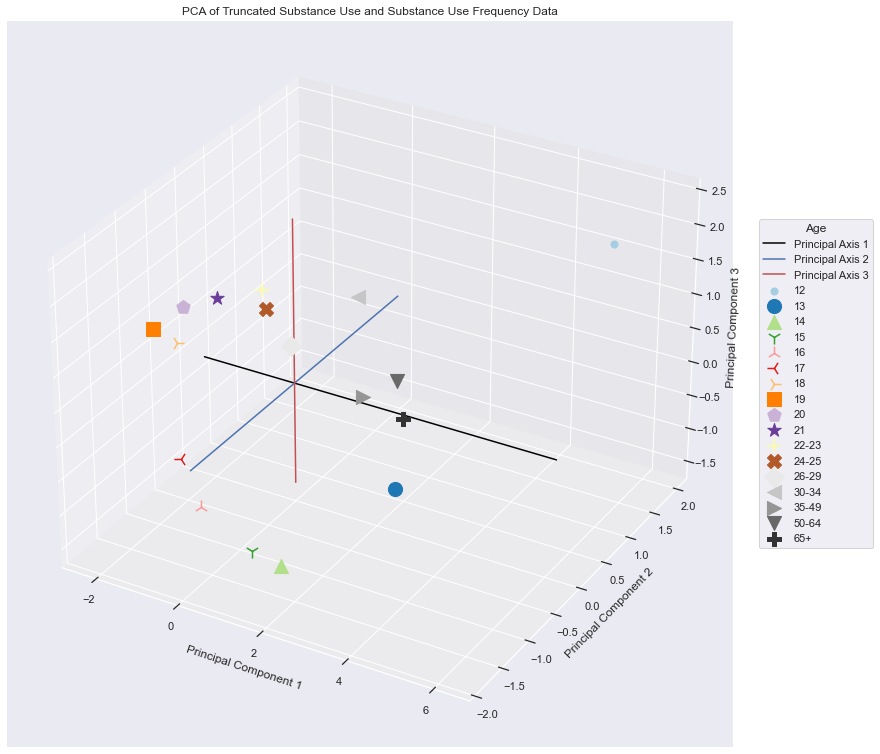

In [29]:
Plot_3D_PCA(PCA_Data_HCV,
            'PCA of Truncated Substance Use and Substance Use Frequency Data');

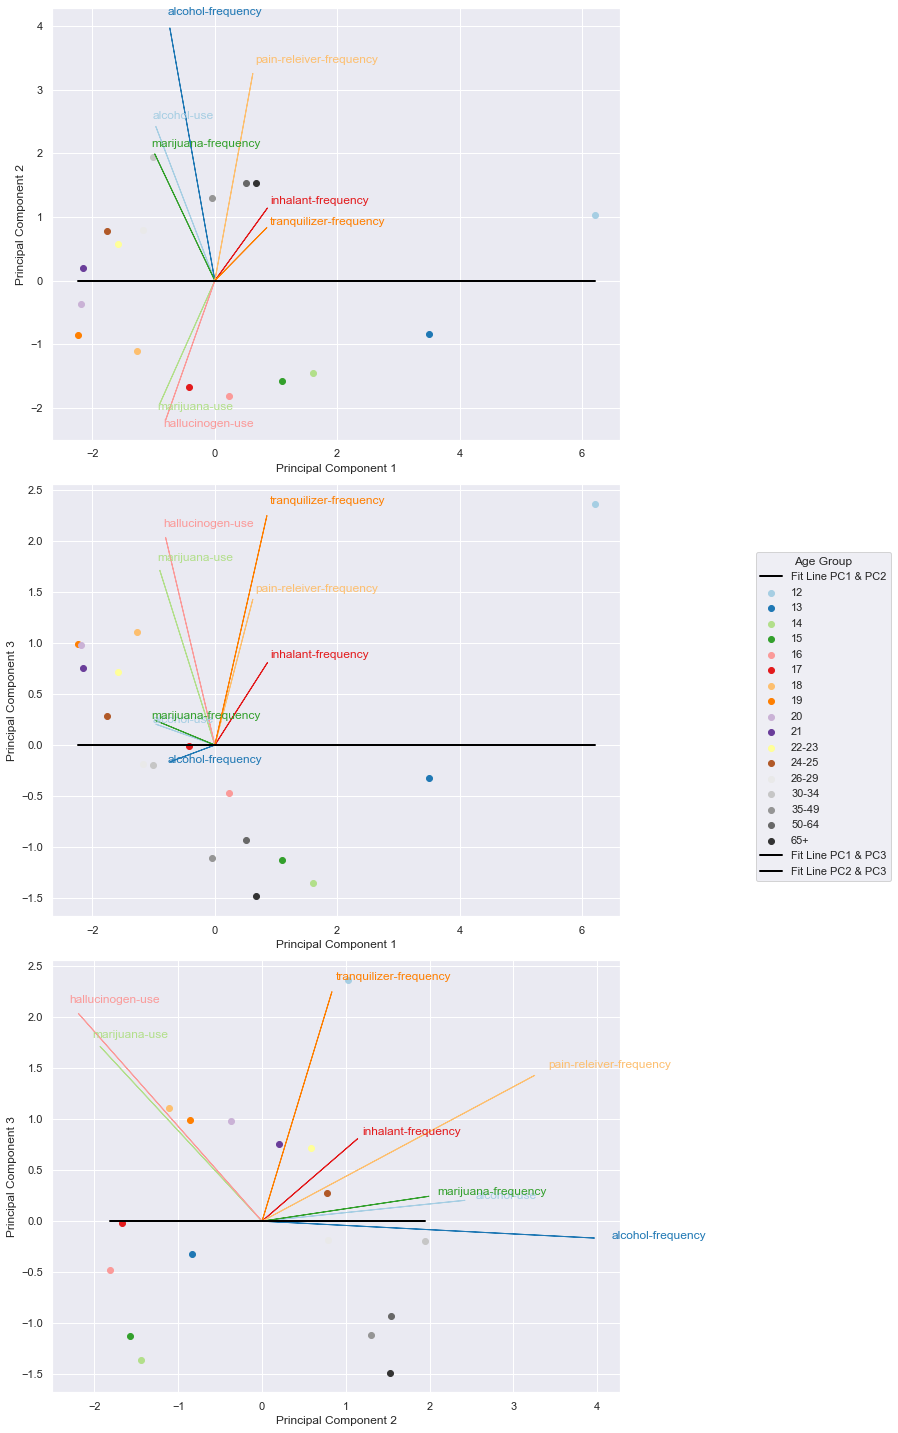

The proportion of the variance accounted for by these 3 Principle Axes is: 90.86 % of variance of the Truncated Substance Use and Substance Use Frequency Data.


In [30]:
Plot_PCA_2D_Plots(pca_hcv_func,PCA_Data_HCV,Substance_Use_and_Freq,0.08);
Total_Var_Ratio_n_Comps(3,pca_hcv_func,
                        'Truncated Substance Use and Substance Use Frequency')

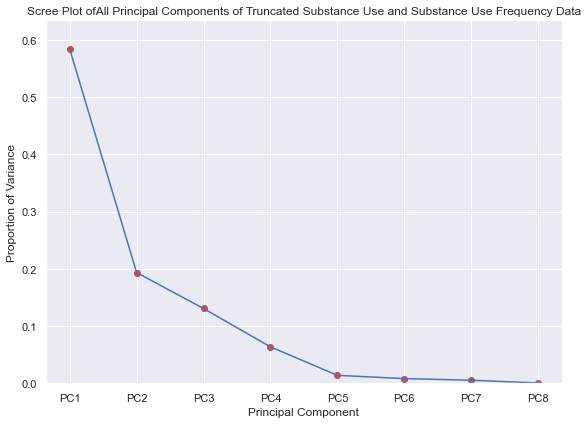

In [31]:
Scree_Plot(Substance_Use_and_Freq.shape[1],pca_hcv_func,
           'All Principal Components of Truncated Substance Use and Substance Use Frequency Data')

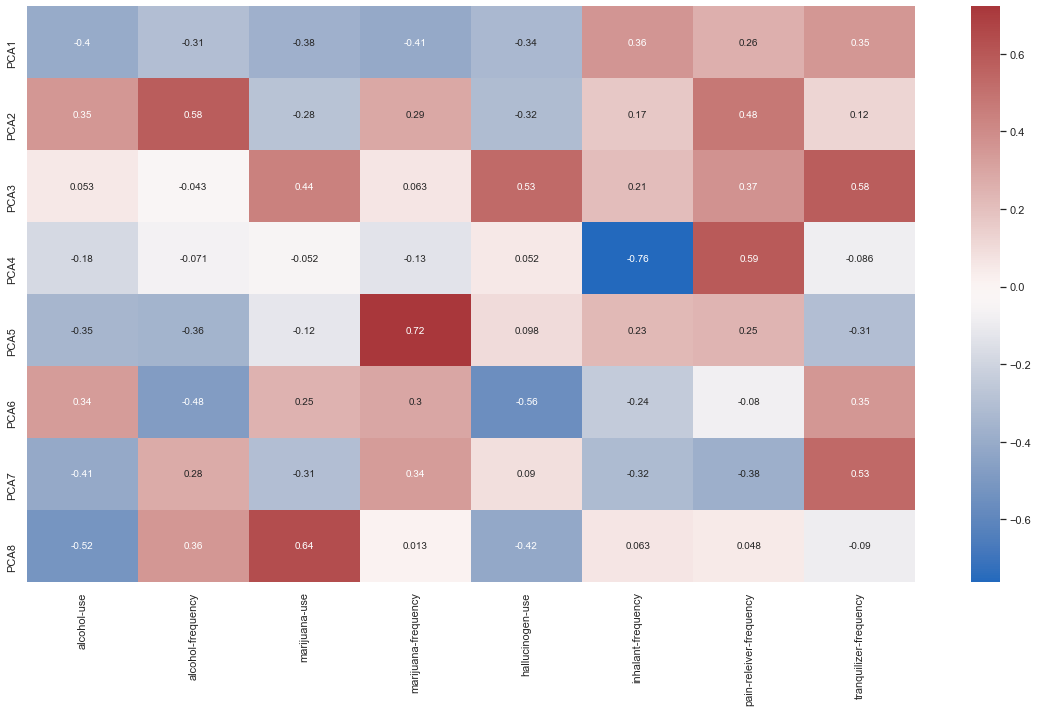

In [32]:
PCA_vs_Data_HeatMap(Substance_Use_and_Freq.shape[1],pca_hcv_func,
                    Substance_Use_and_Freq)

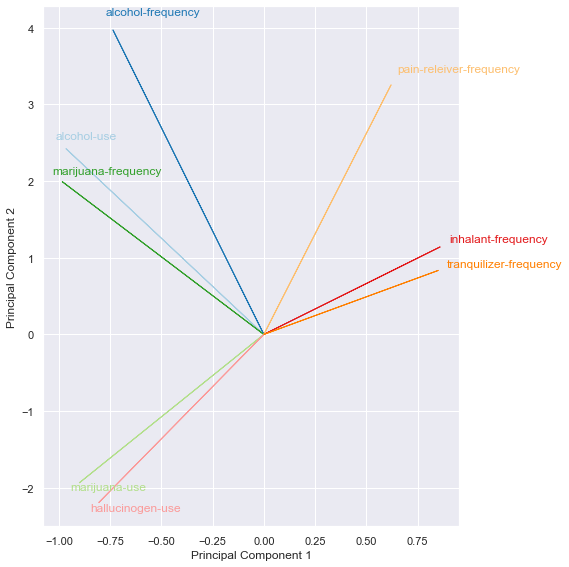

In [33]:
plt.figure(figsize=(8,8))
X_PCA_Comp = 1
Y_PCA_Comp = 2
plt.xlabel('Principal Component '+str(X_PCA_Comp))
plt.ylabel('Principal Component '+str(Y_PCA_Comp))
PCA_BiPlot(plt,pca_hcv_func,PCA_Data_HCV,Substance_Use_and_Freq,
           [X_PCA_Comp-1,Y_PCA_Comp-1],0.08)

### PCA of the Entire DataSet

In [34]:
All_Drug_Data = DrugData.iloc[:,2:]

In [35]:
pca_all_func,PCA_Data_All = PCA_Params_Calc(All_Drug_Data,15)

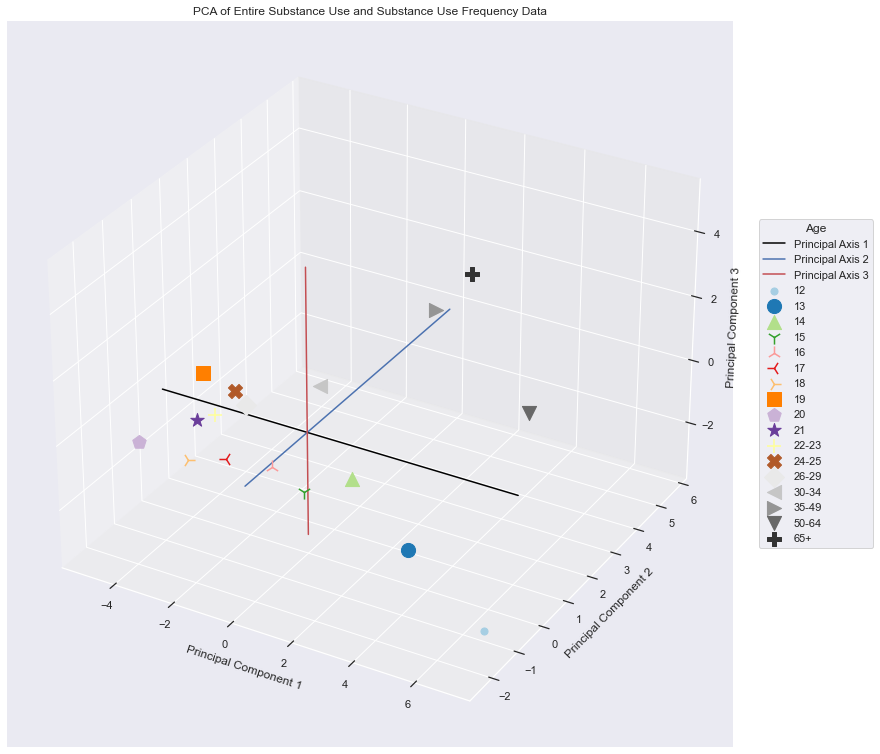

In [36]:
Plot_3D_PCA(PCA_Data_All,
            'PCA of Entire Substance Use and Substance Use Frequency Data');

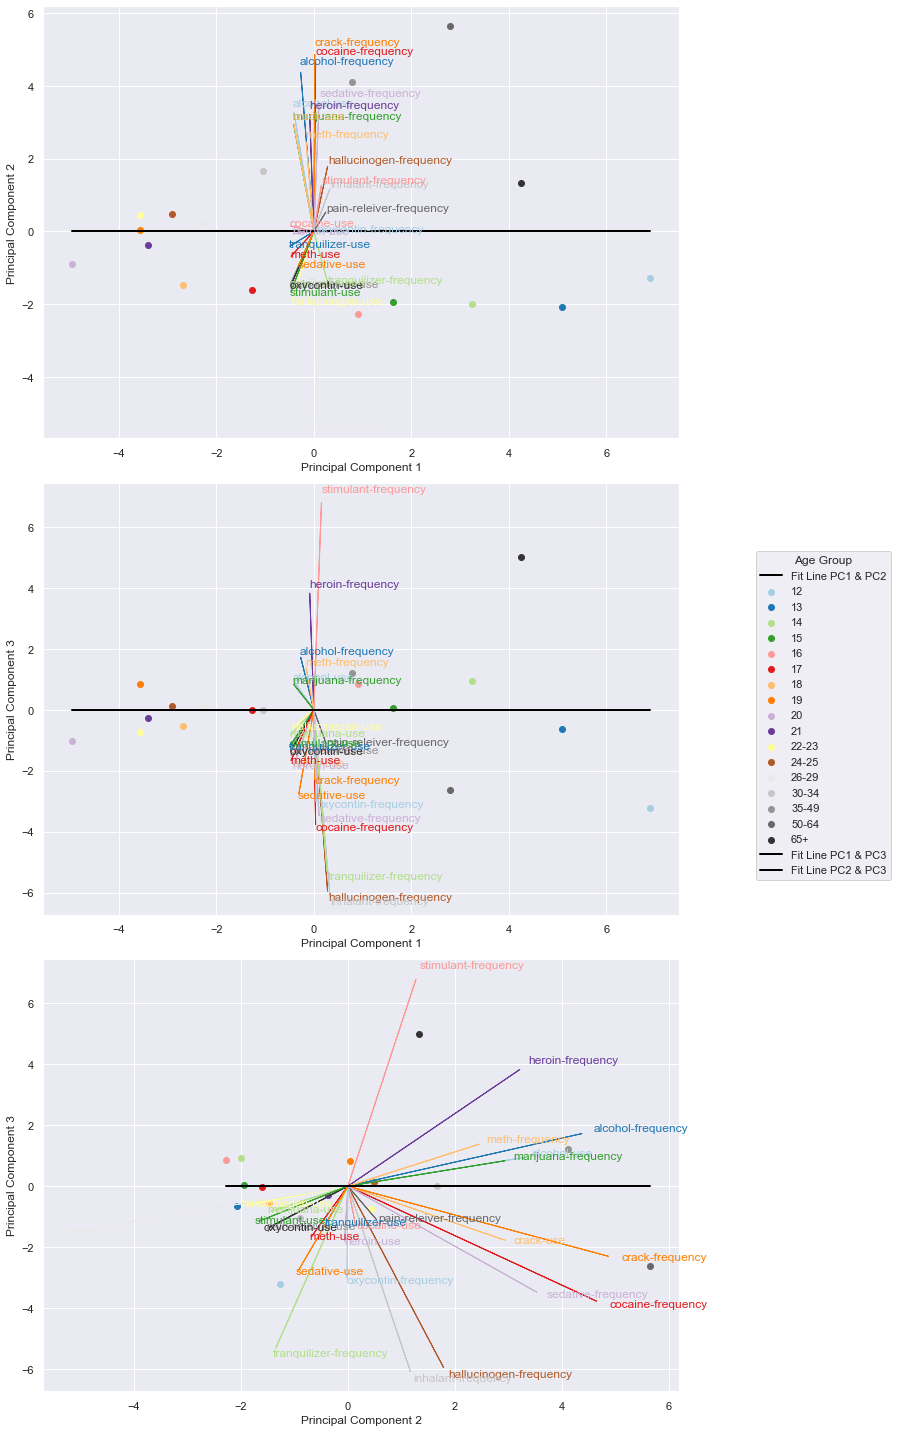

The proportion of the variance accounted for by these 3 Principle Axes is: 73.68 % of variance of the Entire Substance Use and Substance Use Frequency Data.


In [37]:
Plot_PCA_2D_Plots(pca_all_func,PCA_Data_All,All_Drug_Data,0.08);
Total_Var_Ratio_n_Comps(3,pca_all_func,
                        'Entire Substance Use and Substance Use Frequency')

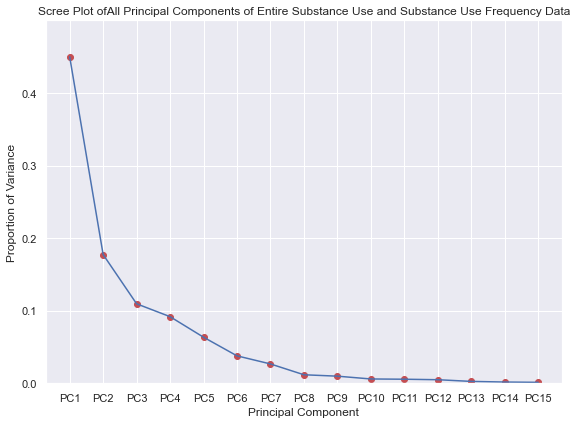

In [38]:
Scree_Plot(15,pca_all_func,
           'All Principal Components of Entire Substance Use and Substance Use Frequency Data')

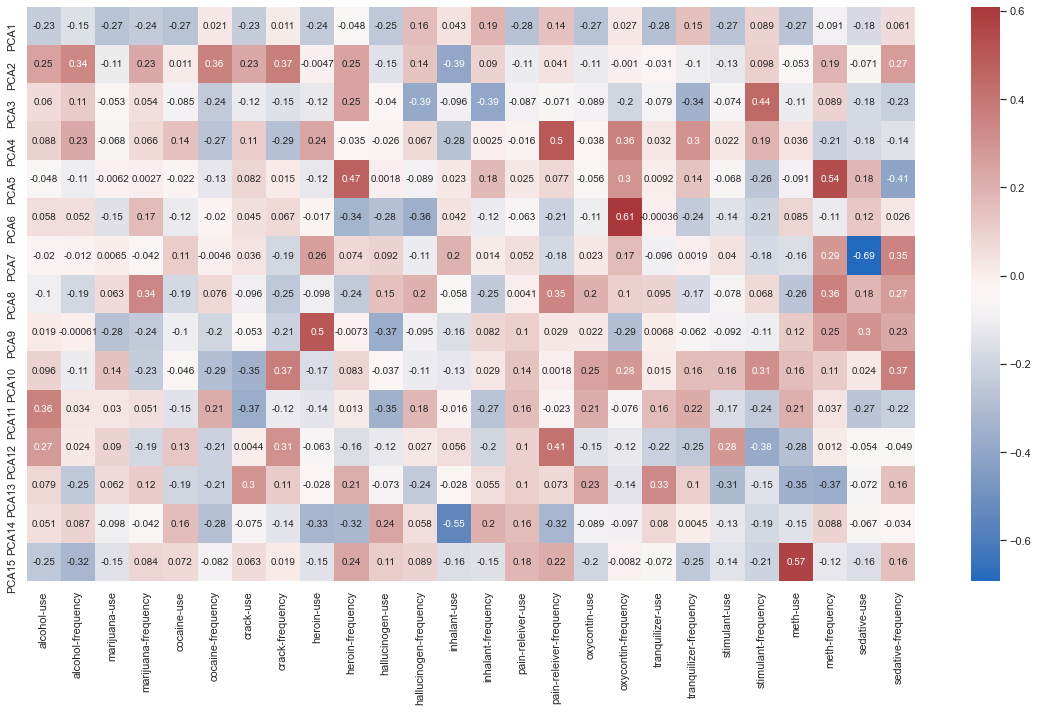

In [39]:
PCA_vs_Data_HeatMap(15,pca_all_func,All_Drug_Data)

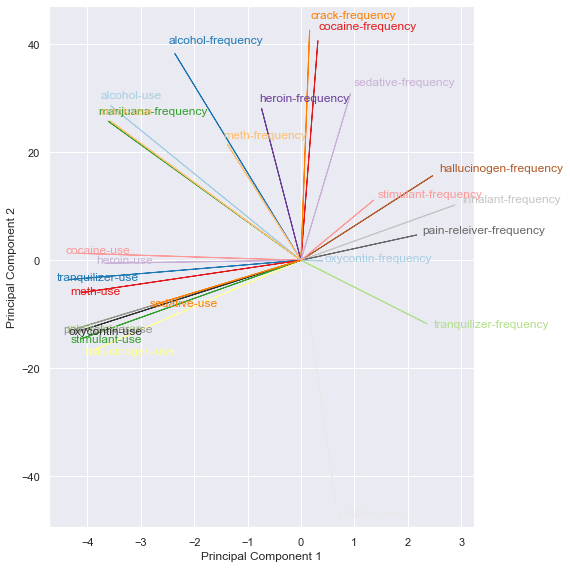

In [40]:
plt.figure(figsize=(8,8))
X_PCA_Comp = 1
Y_PCA_Comp = 2
plt.xlabel('Principal Component '+str(X_PCA_Comp))
plt.ylabel('Principal Component '+str(Y_PCA_Comp))
PCA_BiPlot(plt,pca_all_func,PCA_Data_All,All_Drug_Data,[X_PCA_Comp-1,Y_PCA_Comp-1],0.7)

---

### Projecting Principal Component 4's Points Onto the First 3 Principal Components

In [41]:
ThreeD_Proj_Pts = pd.concat([DrugData[['age']],
                             nD_to_ThreeD(PCA_Data_All,4)],axis=1)

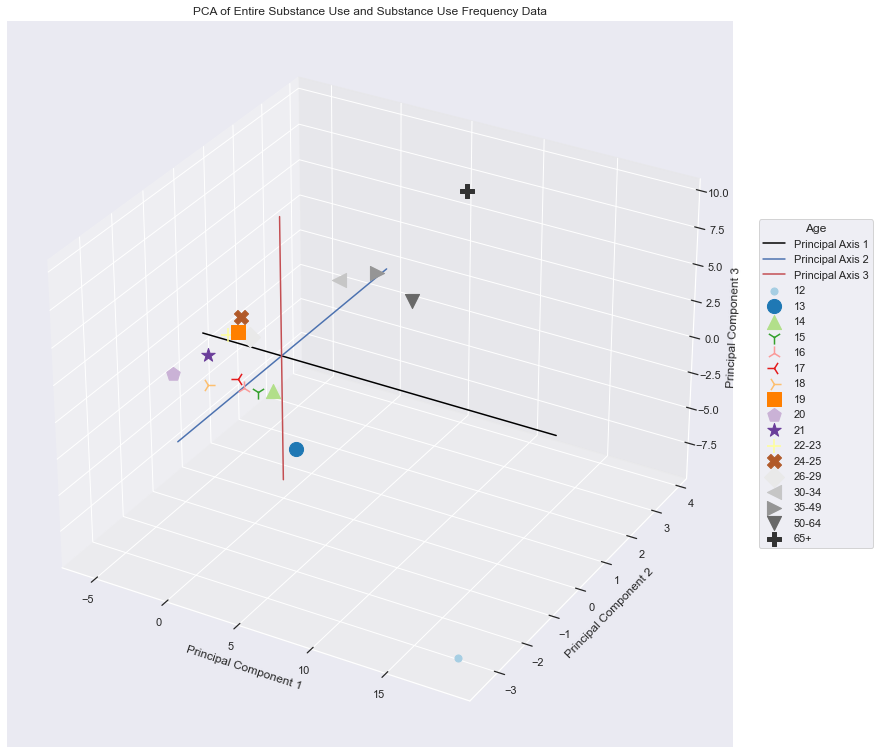

In [42]:
Plot_3D_PCA(ThreeD_Proj_Pts,
            'PCA of Entire Substance Use and Substance Use Frequency Data');

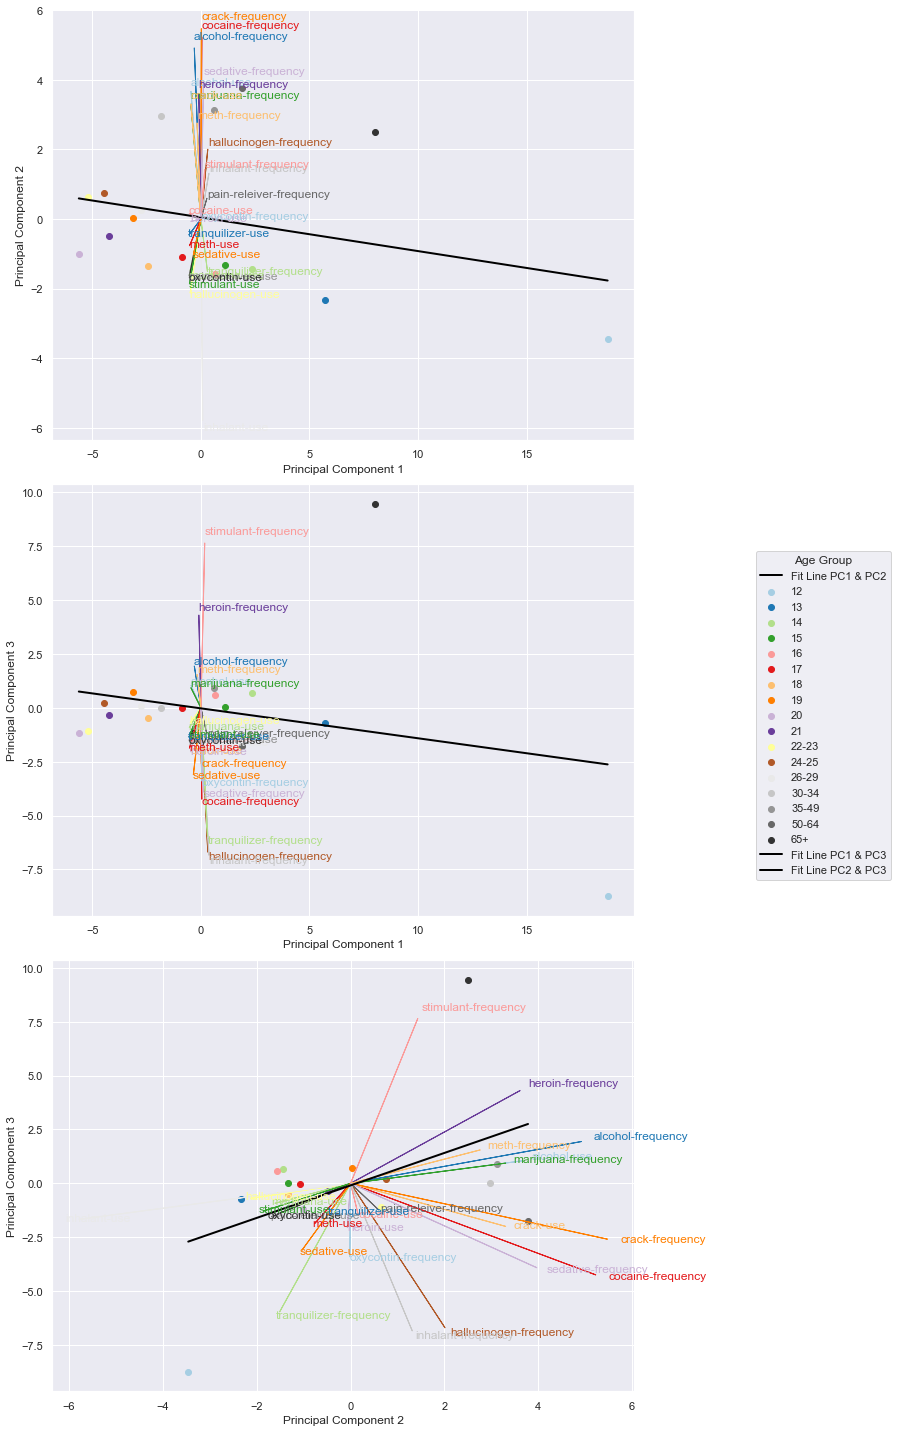

In [43]:
Plot_PCA_2D_Plots(pca_all_func,ThreeD_Proj_Pts,All_Drug_Data,0.09)

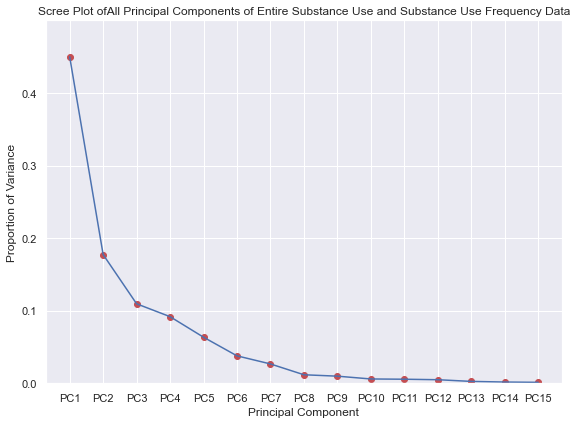

In [44]:
Scree_Plot(15,pca_all_func,
           'All Principal Components of Entire Substance Use and Substance Use Frequency Data')

### Projecting Principal Component 4, 5 and 6's Points Onto the First 3 Principal Components

In [45]:
Projected_Pts_6D = pd.concat([DrugData[['age']],
                              nD_to_ThreeD(PCA_Data_All,6)],axis=1)

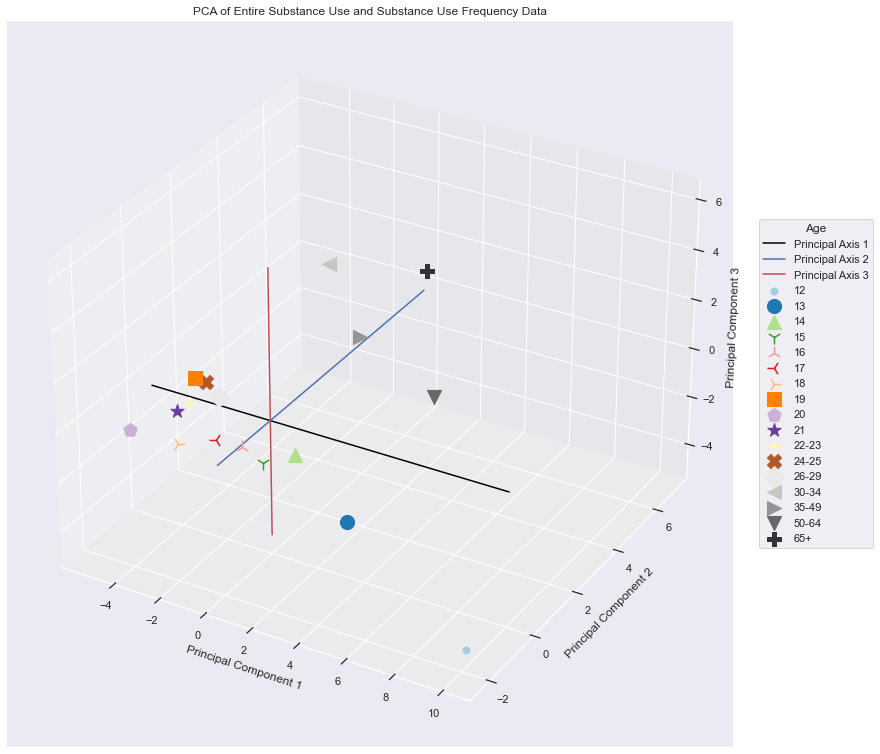

In [46]:
Plot_3D_PCA(Projected_Pts_6D,
            'PCA of Entire Substance Use and Substance Use Frequency Data');

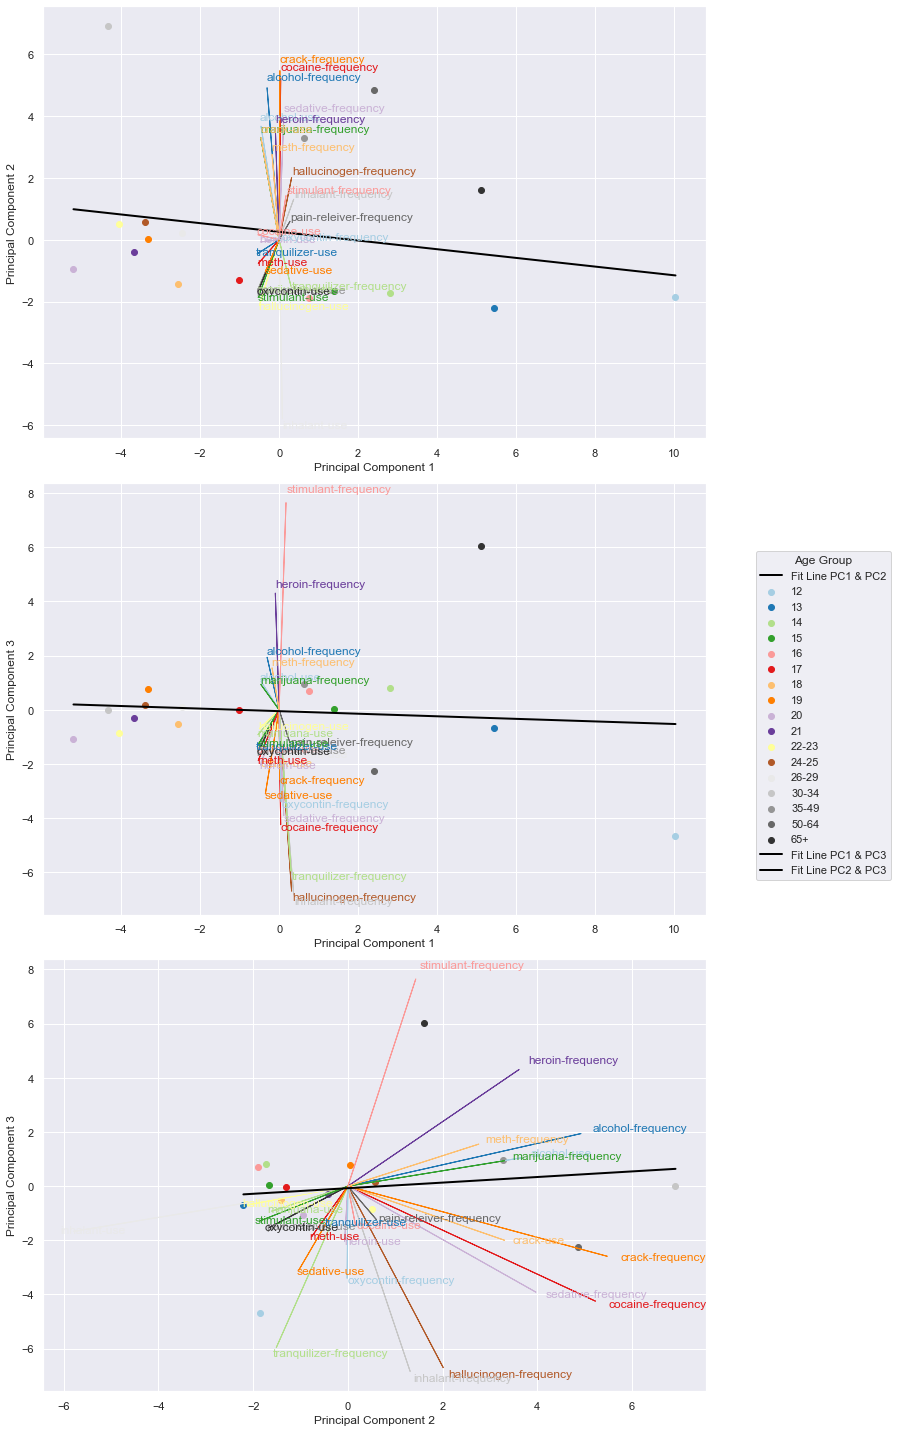

The proportion of the variance accounted for by these 6 Principle Axes is: 92.98 % of variance of the Entire Substance Use and Substance Use Frequency Data.


In [47]:
Plot_PCA_2D_Plots(pca_all_func,Projected_Pts_6D,All_Drug_Data,0.09);
Total_Var_Ratio_n_Comps(6,pca_all_func,
                        'Entire Substance Use and Substance Use Frequency')

---

---
# Code To Generate Rotating 3D Plot Animation

<font color='red'>These cells may take between 3-5 minutes to execute without Multiprocessing Enabled</font>

In [48]:
#!pip install imageio
import time
import imageio
%matplotlib inline

In [54]:
anim_data = Projected_Pts_6D.iloc[:,1:4]
age_data = Projected_Pts_6D.iloc[:,0].values
filenames = []
def PlotMaker3DProjected(angle):
    fig = plt.figure(angle,figsize=(12,12))
    ax = fig.add_subplot(projection='3d')
    for range1 in range(anim_data.shape[0]):
        ax.scatter(anim_data.iloc[range1,0], anim_data.iloc[range1,1],
                       anim_data.iloc[range1,2], s=100, color=color_map_3[range1],
                       marker=markers[range1], label= age_data[range1])

    PCA_Axis_x = ((min(anim_data.iloc[:,0]), max(anim_data.iloc[:,0])), (0, 0), (0,0))
    ax.plot(PCA_Axis_x[0],PCA_Axis_x[1],PCA_Axis_x[2],'black',label='Principal Axis 1')
        
    PCA_Axis_y = ((0,0),(min(anim_data.iloc[:,1]),max(anim_data.iloc[:,1])),(0,0))
    ax.plot(PCA_Axis_y[0],PCA_Axis_y[1], PCA_Axis_y[2],'b',
                label='Principal Axis 2')
        
    PCA_Axis_z = ((0,0),(0,0),(min(anim_data.iloc[:,2]),max(anim_data.iloc[:,2])))
    ax.plot(PCA_Axis_z[0], PCA_Axis_z[1], PCA_Axis_z[2], 'r',
                label='Principal Axis 3')
        
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title("PCA Of Frequency of Drug Use")
        
    lgd = ax.legend(loc="center right", bbox_to_anchor=(0.78, 0.25, 0.45, 0.45), title='Age/Axes')

    ax.view_init(15,angle)
    ax.set_position([0,0,1,1])

    outFilename = "AnimationStep_%d.png" % (angle)
    outFilepath = '6DProjAnimation/'+ "AnimationStep_%d.png" % (angle)
    filenames.append(outFilename)
    fig.savefig(outFilepath, dpi=80, bbox_extra_artists=(lgd,), pad_inches=0.2)
    
    plt.close()

In [55]:
for i in range(360):
    PlotMaker3DProjected(i)

In [56]:
def GIF_Maker(files):
    
    images = []

    for filename in filenames:
        images.append(imageio.imread('6DProjAnimation/'+str(filename)))

    imageio.mimsave('Rotating6DProjPlot.gif', images, format='GIF', fps=30)

In [57]:
GIF_Maker(filenames)

---

---

---

---